# Importing the libararies


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Importing dataset


In [6]:
training_df = pd.read_csv("/content/drive/MyDrive/Project 1 Dataset/Training Data.csv")
testing_df = pd.read_csv("/content/drive/MyDrive/Project 1 Dataset/Testing Data.csv")

# Data Analysis-DE,DM,DC,DV


In [7]:
training_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
testing_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
train_original = training_df.copy()
test_original = testing_df.copy()

In [12]:
training_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
testing_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [14]:
training_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
testing_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [16]:
training_df.shape

(614, 13)

In [17]:
training_df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [18]:
training_df.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [19]:
training_df.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

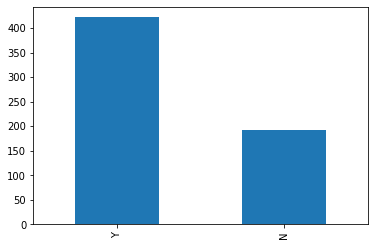

In [20]:
training_df["Loan_Status"].value_counts().plot.bar()

In [21]:
training_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
training_df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [23]:
training_df.Gender.mode()[0]

'Male'

In [24]:
training_df.Gender.fillna(training_df["Gender"].mode()[0], inplace=True)

In [25]:
training_df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [26]:
training_df.Gender.isna().sum()

0

In [27]:
training_df.Married.isna().sum()

3

In [28]:
training_df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [29]:
training_df.Married.mode()

0    Yes
Name: Married, dtype: object

In [30]:
training_df.Married.fillna(training_df["Married"].mode()[0], inplace=True)

In [31]:
training_df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [32]:
training_df.Married.isna().sum()

0

In [33]:
training_df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [34]:
training_df.Dependents.isna().sum()

15

In [35]:
training_df.Dependents.mode()

0    0
Name: Dependents, dtype: object

In [36]:
training_df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [37]:
training_df.Dependents.fillna(training_df["Dependents"].mode()[0], inplace=True)

In [38]:
training_df.Dependents.isna().sum()

0

In [39]:
training_df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [40]:
training_df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [41]:
training_df.Self_Employed.isna().sum()

32

In [42]:
training_df.Self_Employed.fillna(training_df["Self_Employed"].mode()[0], inplace=True)

In [43]:
training_df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [44]:
training_df.Self_Employed.isna().sum()

0

In [45]:
training_df.LoanAmount.isna().sum()

22

In [46]:
training_df.LoanAmount.mean()

146.41216216216216

In [47]:
training_df.LoanAmount.median()

128.0

In [48]:
training_df.LoanAmount.fillna(training_df["LoanAmount"].median(), inplace=True)

In [49]:
training_df.LoanAmount.isna().sum()

0

In [50]:
training_df.Loan_Amount_Term.isna().sum()

14

In [51]:
training_df.Loan_Amount_Term.median()

360.0

In [52]:
training_df.Loan_Amount_Term.mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [53]:
training_df.Loan_Amount_Term.fillna(training_df["Loan_Amount_Term"].mode()[0], inplace=True)

In [54]:
training_df.Loan_Amount_Term.isna().sum()

0

In [55]:
training_df.Credit_History.isna().sum()

50

In [56]:
training_df.Credit_History.unique()

array([ 1.,  0., nan])

In [57]:
training_df.Credit_History.fillna(training_df["Credit_History"].mode()[0], inplace=True)

In [58]:
training_df.Credit_History.isna().sum()

0

In [59]:
training_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [60]:
testing_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [61]:
testing_df.Gender.fillna(training_df["Gender"].mode()[0], inplace=True)
testing_df.Dependents.fillna(training_df["Dependents"].mode()[0], inplace=True)
testing_df.Self_Employed.fillna(training_df["Self_Employed"].mode()[0], inplace=True)
testing_df.Credit_History.fillna(training_df["Credit_History"].mode()[0], inplace=True)

In [62]:
testing_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [63]:
testing_df.Married.isna().sum()

0

In [64]:
testing_df.Married.unique()

array(['Yes', 'No'], dtype=object)

In [65]:
testing_df.Loan_Amount_Term.fillna(training_df["Loan_Amount_Term"].mode()[0], inplace=True)

In [66]:
testing_df.LoanAmount.fillna(training_df["LoanAmount"].median(), inplace=True)

In [67]:
testing_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [68]:
training_df.Gender = training_df.Gender.replace({"Male": 1, "Female" : 0})
testing_df.Gender = testing_df.Gender.replace({"Male": 1, "Female" : 0})
training_df.Self_Employed = training_df.Self_Employed.replace({"Yes": 1, "No" : 0})
testing_df.Self_Employed = testing_df.Self_Employed.replace({"Yes": 1, "No" : 0})

In [69]:
training_df.Self_Employed

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int64

In [70]:
le = LabelEncoder()
training_df.Property_Area = le.fit_transform(training_df["Property_Area"])

In [71]:
training_df.Education = le.fit_transform(training_df["Education"])
training_df.Dependents = le.fit_transform(training_df["Dependents"])

In [72]:
testing_df.Property_Area = le.fit_transform(testing_df["Property_Area"])
testing_df.Education = le.fit_transform(testing_df["Education"])
testing_df.Dependents = le.fit_transform(testing_df["Dependents"])

In [73]:
training_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1,Yes,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,Yes,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,Yes,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,No,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


In [74]:
testing_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,Yes,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,Yes,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,Yes,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,No,0,1,0,3276,0,78.0,360.0,1.0,2


In [75]:
training_df.Married = training_df.Married.replace({"Yes": 1, "No" : 0})
testing_df.Married = testing_df.Married.replace({"Yes": 1, "No" : 0})

In [76]:
training_df.Loan_Status.replace({"Y": 1, "N" : 0}, inplace=True)

In [77]:
training_df.drop("Loan_ID", axis=1, inplace=True)
testing_df.drop("Loan_ID", axis=1, inplace=True)

In [78]:
training_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [79]:
testing_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


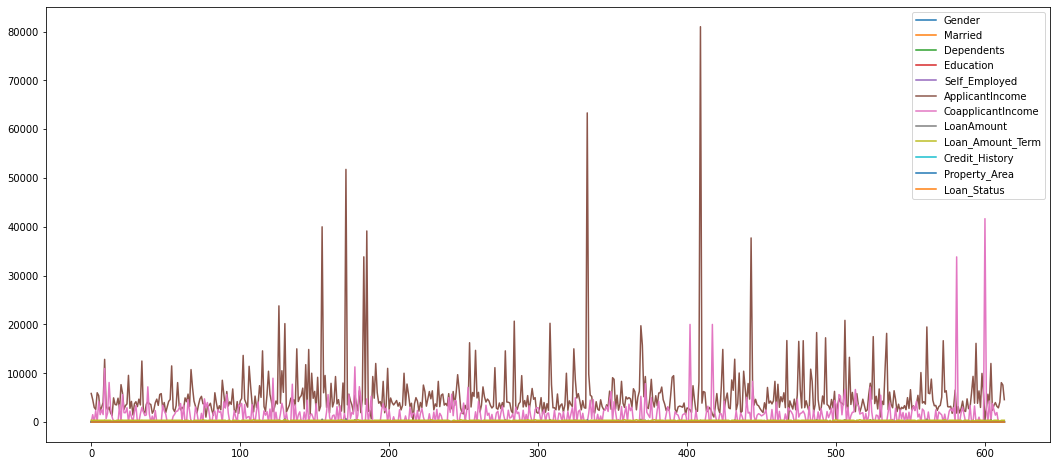

In [80]:
training_df.plot(figsize=(18, 8))
plt.show()

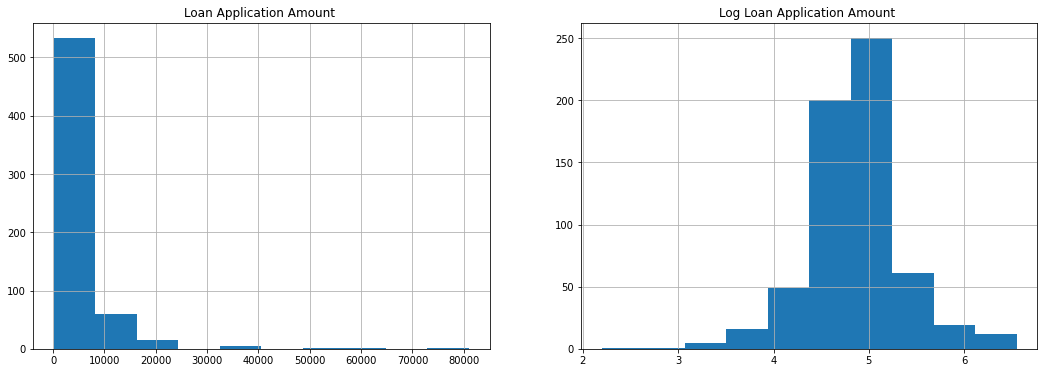

In [81]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


training_df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(training_df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

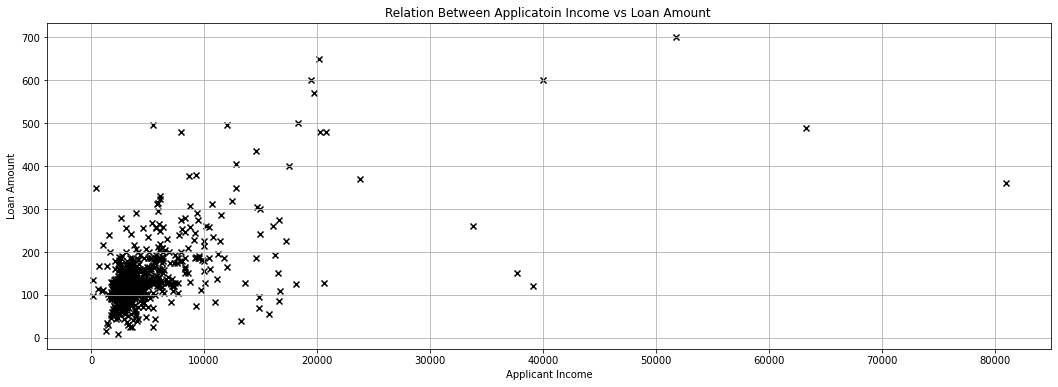

In [82]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(training_df['ApplicantIncome'] , training_df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

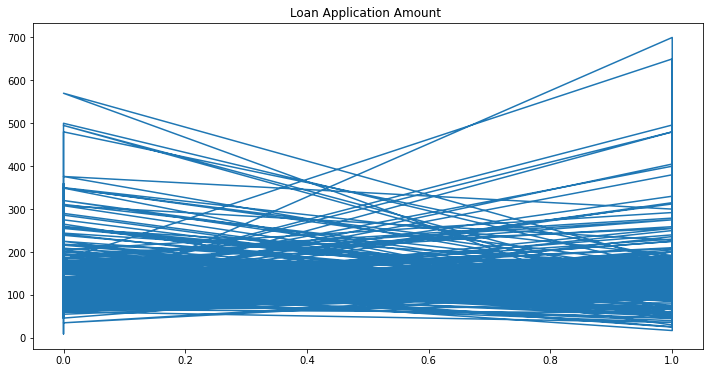

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(training_df['Loan_Status'], training_df['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

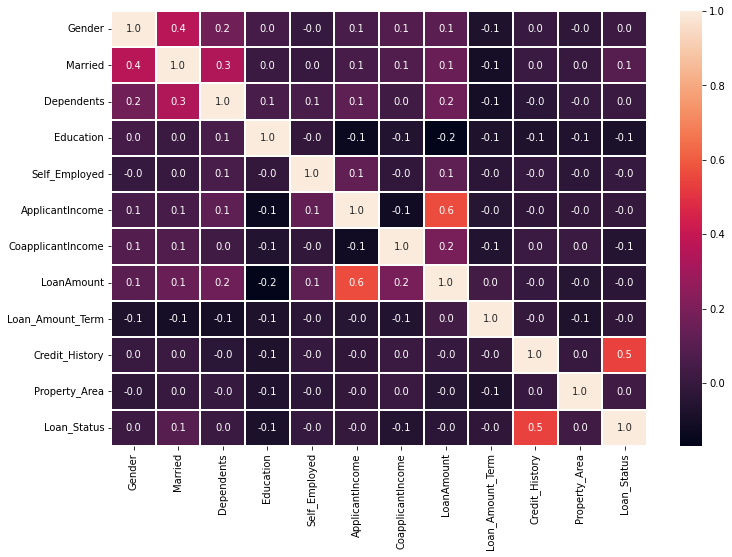

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(training_df.corr(), annot=True, fmt='.1f', linewidths=.1)
plt.show()

# Feature Selection

In [86]:
model = ExtraTreesClassifier()

In [87]:
x = training_df.drop("Loan_Status", axis=1)
y = training_df.Loan_Status

In [88]:
model.fit(x,y)

ExtraTreesClassifier()

In [89]:
model.feature_importances_

array([0.01889882, 0.01944723, 0.05672055, 0.02065   , 0.02062795,
       0.18723009, 0.11845369, 0.17997976, 0.04642821, 0.2825569 ,
       0.04900682])

In [90]:
imortant_features = pd.Series(model.feature_importances_, index=x.columns)

In [91]:
imortant_features

Gender               0.018899
Married              0.019447
Dependents           0.056721
Education            0.020650
Self_Employed        0.020628
ApplicantIncome      0.187230
CoapplicantIncome    0.118454
LoanAmount           0.179980
Loan_Amount_Term     0.046428
Credit_History       0.282557
Property_Area        0.049007
dtype: float64

<Axes: >

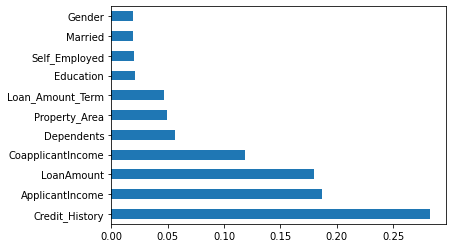

In [92]:
imortant_features.nlargest(11).plot(kind='barh')

# Choosing ML model


In [93]:
skf = StratifiedKFold(n_splits=5)

In [94]:
for train_index,test_index in skf.split(x,y):
  X_train, X_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [95]:
len(X_train)

492

In [96]:
len(X_test)

122

In [97]:
logistic_model = LogisticRegression()

In [98]:
logistic_model.fit(X_train, y_train)
lr_y_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
print(f'Logistic Regression: {accuracy_score(y_test, lr_y_pred)}')

Logistic Regression: 0.8114754098360656


In [100]:
#Classification Report of my model
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        84

    accuracy                           0.81       122
   macro avg       0.85      0.71      0.74       122
weighted avg       0.83      0.81      0.79       122



In [101]:
filename = 'LogisticRegression_Model.pkl'
pkl.dump(logistic_model, open(filename, 'wb'))

In [102]:
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, y_test)
result

0.8114754098360656

# Question with Answers

# What's the ratio of male to female?

In [104]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [105]:
train_original["Gender"].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

<Axes: >

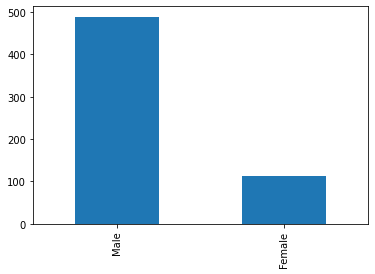

In [106]:
train_original["Gender"].value_counts().plot.bar()

In [ ]:
# approx 81% are male and 19% are female based on the analysis

# How many males are married and non-married?

In [107]:
train_original.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [108]:
train_original[["Gender"]][train_original.Gender == "Male"][train_original.Married == "Yes"].count()

<ipython-input-108-72791f2c89de>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_original[["Gender"]][train_original.Gender == "Male"][train_original.Married == "Yes"].count()


Gender    357
dtype: int64

In [109]:
train_original[["Gender"]][train_original.Gender == "Male"][train_original.Married == "No"].count()

<ipython-input-109-98e50eb119d7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_original[["Gender"]][train_original.Gender == "Male"][train_original.Married == "No"].count()


Gender    130
dtype: int64

In [ ]:
# From 489 males, 357 are married and 130 are not married

# How many Females are married and non-married

In [110]:
train_original[["Gender"]][train_original.Gender == "Female"][train_original.Married == "Yes"].count()

<ipython-input-110-9206b80b749a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_original[["Gender"]][train_original.Gender == "Female"][train_original.Married == "Yes"].count()


Gender    31
dtype: int64

In [111]:
train_original[["Gender"]][train_original.Gender == "Female"][train_original.Married == "No"].count()

<ipython-input-111-25cb4f7860bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_original[["Gender"]][train_original.Gender == "Female"][train_original.Married == "No"].count()


Gender    80
dtype: int64

In [ ]:
# From 112 Females, 31 are married and 80 are not married.

# How many Males and Females are graduated and non-graduated with respect to their Marital status?

In [112]:
train_original[["Gender"]][train_original.Gender == "Male"][train_original.Education == "Graduate"].count()

<ipython-input-112-51ff4c8fb231>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_original[["Gender"]][train_original.Gender == "Male"][train_original.Education == "Graduate"].count()


Gender    376
dtype: int64

In [113]:
train_original[["Gender"]][train_original.Gender == "Male"][train_original.Education == "Not Graduate"].count()

<ipython-input-113-a7261e95100e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_original[["Gender"]][train_original.Gender == "Male"][train_original.Education == "Not Graduate"].count()


Gender    113
dtype: int64

In [114]:
train_original[["Gender"]][train_original.Gender == "Female"][train_original.Education == "Graduate"].count()

<ipython-input-114-54c43126b43b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_original[["Gender"]][train_original.Gender == "Female"][train_original.Education == "Graduate"].count()


Gender    92
dtype: int64

In [115]:
train_original[["Gender"]][train_original.Gender == "Female"][train_original.Education == "Not Graduate"].count()

<ipython-input-115-8fa420b7e344>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_original[["Gender"]][train_original.Gender == "Female"][train_original.Education == "Not Graduate"].count()


Gender    20
dtype: int64

In [ ]:
# From 489 males and 112 Females 
# 376 males are graduated and 113 are not graduated
# 92 Females are Graduated and 20 are not graduated

# Which type of encoding will be required to perform on the "Education" column?

In [ ]:
# LabelEncoder is required for "Education" column.

# Is it a male or a female whose loan amount is the highest?

In [116]:
train_original.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [117]:
training_df[["Gender"]][train_original.LoanAmount == 700]

,Gender
171,1


In [ ]:
# As 1 is for male the highest loan amount is taken by male

# the specification and information about the applicant who has the highest income?

In [118]:
training_df[train_original.LoanAmount == 700]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,1,1,3,0,0,51763,0.0,700.0,300.0,1.0,2,1


In [119]:
train_original[train_original.LoanAmount == 700]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


In [ ]:
# He is a man , he is married , also Graduated, but not self-employed, belong from Urban area

# What all features are you going to consider for the model training and why? (Give the appropriate reason forchoosing such features among others)

In [ ]:
#we are using 'Credit_History', 'Education', 'Gender' features for training.

<Axes: >

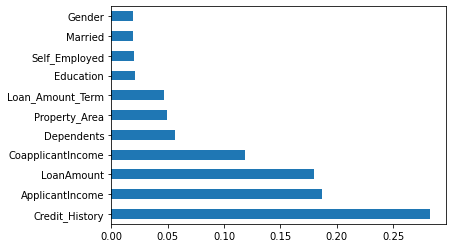

In [120]:
imortant_features.nlargest(11).plot(kind='barh')

# Which model are you going to choose and define the reason for going with the same model?

In [ ]:
# tried different models but i was satisfied with Logistic Regression

#  Have you performed the Hyper Parameter Tuning?

In [ ]:
# yes i have performed hyper parameter tuning

# Compare the Actual results with the Predicted results

In [121]:
final = pd.DataFrame({"Actual": y_test,
                      "LRC": lr_y_pred,})

In [122]:
final

,Actual,LRC
491,1,1
492,1,1
493,1,1
495,1,1
496,1,1
...,...,...
609,1,1
610,1,1
611,1,1
612,1,1


# What's the acccuracy of your model

In [123]:
print(f'Logistic Regression: {accuracy_score(y_test, lr_y_pred)}')

Logistic Regression: 0.8114754098360656


In [ ]:
#My model accuracy is 0.8114754098360656

# In order to improve the accuracy what approached can be made

In [ ]:
#Collect data: Increase the number of training examples.
#Feature processing: Add more variables and better feature processing.
#Model parameter tuning: Consider alternate values for the training parameters used by your learning algorithm.

# What can you conclude with respect to the data

In [ ]:
#In this project, I learned how to create an model to predict the target variable, i.e. if the applicant will be able to repay the loan or not.